<a href="https://colab.research.google.com/github/149189/Mumbai_Weather_data_Predictions/blob/main/Mumbai_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd

weather = pd.read_csv("rainfall.csv")
weather



,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0


In [ ]:
weather["datetime"]

0       01-01-2016
1       02-01-2016
2       03-01-2016
3       04-01-2016
4       05-01-2016
           ...    
1776    11-11-2020
1777    12-11-2020
1778    13-11-2020
1779    14-11-2020
1780    15-11-2020
Name: datetime, Length: 1781, dtype: object

In [ ]:
weather_1hot = pd.get_dummies(weather)
weather_1hot.head()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype,datetime_01-01-2016,...,datetime_31-08-2020,datetime_31-10-2016,datetime_31-10-2017,datetime_31-10-2018,datetime_31-10-2019,datetime_31-10-2020,datetime_31-12-2016,datetime_31-12-2017,datetime_31-12-2018,datetime_31-12-2019
0,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = weather_1hot.drop("temp",axis =1)
y = weather_1hot["temp"]
from sklearn.model_selection import train_test_split
x.size

3186209

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.01,random_state = 42)
len(x),len(x_train),len(x_test),len(y),len(y_train),len(y_test)

(1781, 1763, 18, 1781, 1763, 18)

In [ ]:
tf.random.set_seed(42)
weather_model = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(50),
                                     tf.keras.layers.Dense(1)])

weather_model.compile(loss = "mae",optimizer = tf.keras.optimizers.Adam(1),metrics = ["mae"])
history = weather_model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
56/56 [==============================] - 1s 5ms/step - loss: 757050.2500 - mae: 757050.2500
Epoch 2/100
56/56 [==============================] - 0s 6ms/step - loss: 11661.8965 - mae: 11661.8965
Epoch 3/100
56/56 [==============================] - 0s 6ms/step - loss: 165.2637 - mae: 165.2637
Epoch 4/100
56/56 [==============================] - 0s 6ms/step - loss: 16.0113 - mae: 16.0113
Epoch 5/100
56/56 [==============================] - 0s 6ms/step - loss: 13.7108 - mae: 13.7108
Epoch 6/100
56/56 [==============================] - 0s 7ms/step - loss: 10.3789 - mae: 10.3789
Epoch 7/100
56/56 [==============================] - 0s 9ms/step - loss: 22.4490 - mae: 22.4490
Epoch 8/100
56/56 [==============================] - 0s 8ms/step - loss: 11.6752 - mae: 11.6752
Epoch 9/100
56/56 [==============================] - 0s 8ms/step - loss: 15.3760 - mae: 15.3760
Epoch 10/100
56/56 [==============================] - 0s 8ms/step - loss: 11.5855 - mae: 11.5855
Epoch 11/100
56/56 [===

In [ ]:
import matplotlib.pyplot as plt

weather_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 142ms/step - loss: 1.1185 - mae: 1.1185


[1.118502140045166, 1.118502140045166]

In [ ]:
y_predictions = weather_model.predict(x_test)
y_predictions

1/1 [==============================] - 0s 77ms/step


array([[29.229599],
       [27.85921 ],
       [29.366982],
       [28.876003],
       [28.445492],
       [29.426867],
       [28.820108],
       [29.481174],
       [28.295622],
       [29.410076],
       [27.597347],
       [27.696447],
       [28.904867],
       [28.07072 ],
       [28.603443],
       [28.558413],
       [29.250687],
       [27.99044 ]], dtype=float32)

In [ ]:
y_test

824     29.3
1470    25.7
233     28.6
798     28.6
777     29.2
270     28.2
416     29.2
1568    30.3
1344    27.2
111     29.1
736     24.7
1084    24.8
173     28.4
741     28.0
1168    26.4
1384    31.3
188     28.6
1377    28.3
Name: temp, dtype: float64

Text(0.5, 0, 'epochs')

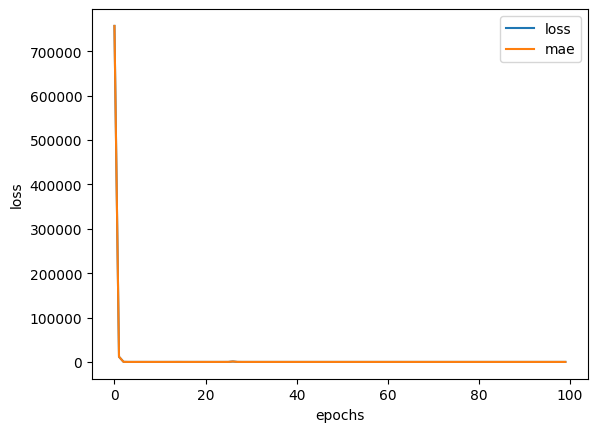

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")